### 1. LIBRARIES IMPORTS

In [1]:
#Standard python libraries
import pandas as pd
import numpy as np

#Re and String libraries for text handling and text format
import re
import string

#NLTK libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
from nltk import word_tokenize
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Data Visualization libraries
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

#Libraries for visual representation of text data
from wordcloud import WordCloud

#Libraries for holding data in unordered collection.
from collections import Counter

#Libraries for Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import plotly
plotly.offline.init_notebook_mode (connected = True)

### 2. DATA COLLECTION/IMPORTING DATASET

In [3]:
#Loading our dataset
data=pd.read_csv("ProjectTweets.csv", encoding='ISO-8859-1')

#Checking top of our dataset head
data.head(5)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
#Renaming our dataset columns
data.columns=["Sentiments", "IDs", "Date", "Flag", "User", "TweetText"]

#Checking top of our dataframe
data.head()

,Sentiments,IDs,Date,Flag,User,TweetText
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
#Checking data types in columns of our dataset
data.dtypes

Sentiments     int64
IDs            int64
Date          object
Flag          object
User          object
TweetText     object
dtype: object

In [6]:
data.shape

(1599999, 6)

In [7]:
#Checking information in columns of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Sentiments  1599999 non-null  int64 
 1   IDs         1599999 non-null  int64 
 2   Date        1599999 non-null  object
 3   Flag        1599999 non-null  object
 4   User        1599999 non-null  object
 5   TweetText   1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
data.describe()

,Sentiments,IDs
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [9]:
#Checking columns with null values in our dataset
data.isnull().sum()

Sentiments    0
IDs           0
Date          0
Flag          0
User          0
TweetText     0
dtype: int64

In [10]:
data['Date'].agg(['min', 'max'])

min    Fri Apr 17 20:30:31 PDT 2009
max    Wed May 27 07:27:38 PDT 2009
Name: Date, dtype: object

### 3. TEXT PREPROCESSNG

In [11]:
#Spelling correction.
def spell_correct(data):
    data['TweetText'].apply(lambda x: str(TextBlob(x).correct()))

In [12]:
#Removing links as they might contain irrelevant information as well as posing security risks in Natural Language Processing (NLP).
def hyperlinks(TweetText):
    temp = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', TweetText)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('&gt;', "", temp) # greater than sign
    temp = re.sub('&#x27;', "'", temp) # apostrophe
    temp = re.sub('&#x2F;', ' ', temp)
    temp = re.sub('<p>', ' ', temp) # paragraph tag
    temp = re.sub('<i>', ' ', temp) #italics tag
    temp = re.sub('</i>', '', temp) 
    temp = re.sub('&#62;', '', temp)
    temp = re.sub("\n", '', temp) # newline 
    return temp

In [13]:
#Removing imoji's as they pose a challenge in Natural Language Processing (NPL).
def remove_emoji(string):
        emoji_pattern = re.compile("["
                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U000024C2-\U0001F251"
                            u"\U00002702-\U000027B0"
                                   "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', string) 

In [14]:
#Cleaning and removing stopwords
def clean_TweetText(TweetText):
    temp=TweetText.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("chatgpt","",temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    punc=string.punctuation
    temp=temp.translate(str.maketrans('','',punc))
    
    #removing stopwords
    new_list=[]
    words=word_tokenize(temp)
    sws=stopwords.words('english')
    for word in words:
        if word not in sws:
            new_list.append(word)
    
    temp=' '.join(new_list)
    return temp

In [15]:
#Lemmatization, grouping together the inflected forms of a word so they can be analysed as a single item. 
def lemmatize(TweetText):    
    new_list=[]
    lemma=WordNetLemmatizer()
    words=word_tokenize(TweetText)
    for word in words:
        new_list.append(lemma.lemmatize(word))
    
    return ' '.join(new_list)

In [16]:
#Combining all of above functions (stopwords, words, hashtags and character count) into one function. 
#feat_extract(data)

data['TweetText'] = data['TweetText'].apply(hyperlinks)
data['TweetText'] = data['TweetText'].apply(remove_emoji)
data['TweetText'] = data['TweetText'].apply(clean_TweetText)
data['final_TweetText'] = data['TweetText'].apply(lemmatize)

In [17]:
data.head(5)

,Sentiments,IDs,Date,Flag,User,TweetText,final_TweetText
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...,upset cant update facebook texting might cry r...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...,dived many time ball managed save 50 rest go b...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire,whole body feel itchy like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behaving im mad cant see,behaving im mad cant see
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,whole crew,whole crew


In [18]:
data.loc[:, 'TweetText':'final_TweetText']

,TweetText,final_TweetText
0,upset cant update facebook texting might cry r...,upset cant update facebook texting might cry r...
1,dived many times ball managed save 50 rest go ...,dived many time ball managed save 50 rest go b...
2,whole body feels itchy like fire,whole body feel itchy like fire
3,behaving im mad cant see,behaving im mad cant see
4,whole crew,whole crew
...,...,...
1599994,woke school best feeling ever,woke school best feeling ever
1599995,thewdbcom cool hear old walt interviews â «,thewdbcom cool hear old walt interview â «
1599996,ready mojo makeover ask details,ready mojo makeover ask detail
1599997,happy 38th birthday boo alll time tupac amaru ...,happy 38th birthday boo alll time tupac amaru ...


### 4. FEATURE EXTRACTION

In [19]:
#Returning a copy of dataframe to avoid changes affecting our original dataframe.
data.copy()

,Sentiments,IDs,Date,Flag,User,TweetText,final_TweetText
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...,upset cant update facebook texting might cry r...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...,dived many time ball managed save 50 rest go b...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire,whole body feel itchy like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behaving im mad cant see,behaving im mad cant see
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,whole crew,whole crew
...,...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,woke school best feeling ever,woke school best feeling ever
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdbcom cool hear old walt interviews â «,thewdbcom cool hear old walt interview â «
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,ready mojo makeover ask details,ready mojo makeover ask detail
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday boo alll time tupac amaru ...,happy 38th birthday boo alll time tupac amaru ...


In [20]:
#Checking number of stopwords.
stop_words = stopwords.words('english')

def num_of_stopwords(data):
    data['stopwords_count'] = data['TweetText'].apply(lambda x: len([x for x in x.split() if x in stop_words]))

In [21]:
#Number of words for each tweet will be calculated to analyse any trend in the tweets based on the sentiment
def number_of_words(data):
    data['word_count'] = data['TweetText'].apply(lambda x : len(str(x).split(" ")))

In [22]:
#Checking number of hashtags
def num_of_hashtags(data):
    data['hashtag_count'] = data['TweetText'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

In [23]:
#Number of characters for each tweet will be calculated to analyse any trend in the tweets based on the sentiment
def char_count(TweetText):
    charc=0
    for char in TweetText.split():
        charc +=len(char)
    return charc

In [24]:
#Combining the above functions (stopwords, words, hashtags and character count) into one function. 
def feat_extract(data):
    num_of_stopwords(data)
    number_of_words(data)
    num_of_hashtags(data)
    data['char_count']=data['TweetText'].apply(char_count)    

### 5. SENTIMENT ANALYSIS

In [25]:
#Creating a sentiment intensity analyzer function that will help us assign a polarity score.
sid=SentimentIntensityAnalyzer()

In [26]:
#Assigning a polarity score to each tweet in our dataset while labelling the tweets based on that score as POSITIVE, NEUTRAL and NEGATIVE.
data['Sentiments_compound_polarity']=data.final_TweetText.apply(lambda x:sid.polarity_scores(x)['compound'])
data['Sentiments_neutral']=data.final_TweetText.apply(lambda x:sid.polarity_scores(x)['neu'])
data['Sentiments_negative']=data.final_TweetText.apply(lambda x:sid.polarity_scores(x)['neg'])
data['Sentiments_positive']=data.final_TweetText.apply(lambda x:sid.polarity_scores(x)['pos'])
data['Sentiments_type']=''

In [27]:
#Asigning Sentiment types based on what number polarity takes.
data.loc[data.Sentiments_compound_polarity>0,'Sentiments']='POSITIVE'
data.loc[data.Sentiments_compound_polarity<0,'Sentiments']='NEGATIVE'
data.loc[data.Sentiments_compound_polarity==0,'Sentiments']='NEUTRAL'

#Checking top of our data.
data.head()

,Sentiments,IDs,Date,Flag,User,TweetText,final_TweetText,Sentiments_compound_polarity,Sentiments_neutral,Sentiments_negative,Sentiments_positive,Sentiments_type
0,NEGATIVE,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...,upset cant update facebook texting might cry r...,-0.7269,0.559,0.441,0.000,
1,POSITIVE,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...,dived many time ball managed save 50 rest go b...,0.4939,0.738,0.000,0.262,
2,NEGATIVE,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire,whole body feel itchy like fire,-0.2500,0.300,0.450,0.250,
3,NEGATIVE,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behaving im mad cant see,behaving im mad cant see,-0.4939,0.556,0.444,0.000,
4,NEUTRAL,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,whole crew,whole crew,0.0000,1.000,0.000,0.000,


### 6. EXPLORATORY DATA ANALYSIS (EDA)

#### Sentiment Types Visualization

In [28]:
#Determining Sentiment count for each category.
sentiment_counts = data.groupby(['Sentiments']).size()
print(sentiment_counts)

Sentiments
NEGATIVE    396396
NEUTRAL     427303
POSITIVE    776300
dtype: int64


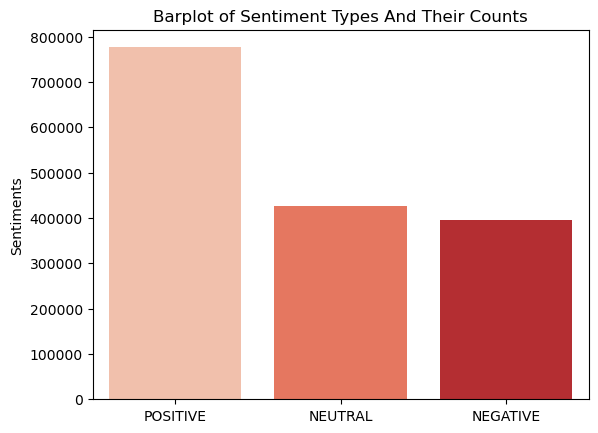

In [29]:
#Creatig a barplot depicting sentiment types and its count
sns.barplot(data=data,
            x=data['Sentiments'].value_counts().index,
            y=data['Sentiments'].value_counts(),
            palette='Reds').set_title('Barplot of Sentiment Types And Their Counts');

In [30]:
#Plotting funnel are for Sentiments showing different levels.
fig = go.Figure(go.Funnelarea(
    text =data['Sentiments'].value_counts().index,
    values = data['Sentiments'].value_counts(),
    title = {"position": "top center",
             "text": "Sentiments Distribution Funnel-Chart"}
    ))
fig.show()

#### Common Words In a Tweet Text

In [31]:
#Assigning eda name to a copy of dataframe and create a function.
eda=data.copy()
eda['temp_list'] = eda['final_TweetText'].apply(lambda x:str(x).split())
top = Counter([item for sublist in eda['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common Words','Count']

In [51]:
#Bar plot for most common words using plotly.express libraries.
fig = px.bar(temp, x="Count", y="Common Words", title='Barplot for Commmon Words', orientation='h', 
             width=700, height=700,color='Common Words')
fig.show()

In [50]:
#A tree map using plotly.express library of most common words.
fig = px.treemap(temp, path=['Common Words'], values='Count',title='A Tree Map of Most Common Words')
fig.show()

#### Common Words In a Tweet Text by Sentiment Types

In [34]:
#Assigning each sentiment type in our new eda dataset to a given name as Negative, Positive and Neutral.
pos=eda[eda['Sentiments']=='POSITIVE']
neg=eda[eda['Sentiments']=='NEGATIVE']
neu=eda[eda['Sentiments']=='NEUTRAL']

1. Common Positive Words Plot(s)

In [35]:
#Plotting a table depicting most common positive words
top = Counter([item for sublist in pos['temp_list'] for item in sublist])
temp_pos = pd.DataFrame(top.most_common(10))
temp_pos.columns = ['Common Words', 'Count']
temp_pos.style.background_gradient(cmap='Blues')

,Common Words,Count
0,im,88247
1,good,80420
2,love,63790
3,like,60353
4,day,58982
5,lol,47955
6,get,44360
7,u,41161
8,thanks,37911
9,go,37398


In [36]:
#Creating a Treemap Graph of Occuring Common Positive Words in a TweetText
fig = px.treemap(temp_pos, path=['Common Words'],
                 values='Count',
                 title='Treemap Graph of Occuring Common Positive Words in a Tweet Text')
fig.show()

2. Common Neutral Words Plot(s)

In [52]:
#Plotting a table depicting most common neutral words
top = Counter([item for sublist in pos['temp_list'] for item in sublist])
temp_pos = pd.DataFrame(top.most_common(10))
temp_pos.columns = ['Common Words', 'Count']
temp_pos.style.background_gradient(cmap='Greens')

,Common Words,Count
0,im,88247
1,good,80420
2,love,63790
3,like,60353
4,day,58982
5,lol,47955
6,get,44360
7,u,41161
8,thanks,37911
9,go,37398


In [53]:
#Creating a Tree Map Graph of common neutral Words in a TweetText
fig = px.treemap(temp_pos, path=['Common Words'],
                 values='Count',
                 title='Treemap Graph of Occuring Common Neutral Words in a Tweet Text')
fig.show()

3. Common Negative Words Plot(s)

In [54]:
#Plotting a table depicting most common negative words
top = Counter([item for sublist in pos['temp_list'] for item in sublist])
temp_pos = pd.DataFrame(top.most_common(10))
temp_pos.columns = ['Common Words', 'Count']
temp_pos.style.background_gradient(cmap='Reds')

,Common Words,Count
0,im,88247
1,good,80420
2,love,63790
3,like,60353
4,day,58982
5,lol,47955
6,get,44360
7,u,41161
8,thanks,37911
9,go,37398


In [55]:
#Creating a Tree Map Graph of common Negative Words in a TweetText
fig = px.treemap(temp_pos, path=['Common Words'],
                 values='Count',
                 title='Treemap Graph of Occuring Common Neutral Words in a Tweet Text')
fig.show()

#### Word Clouds by Sentiment Types

1. Creating wordcloud for Positive tweets

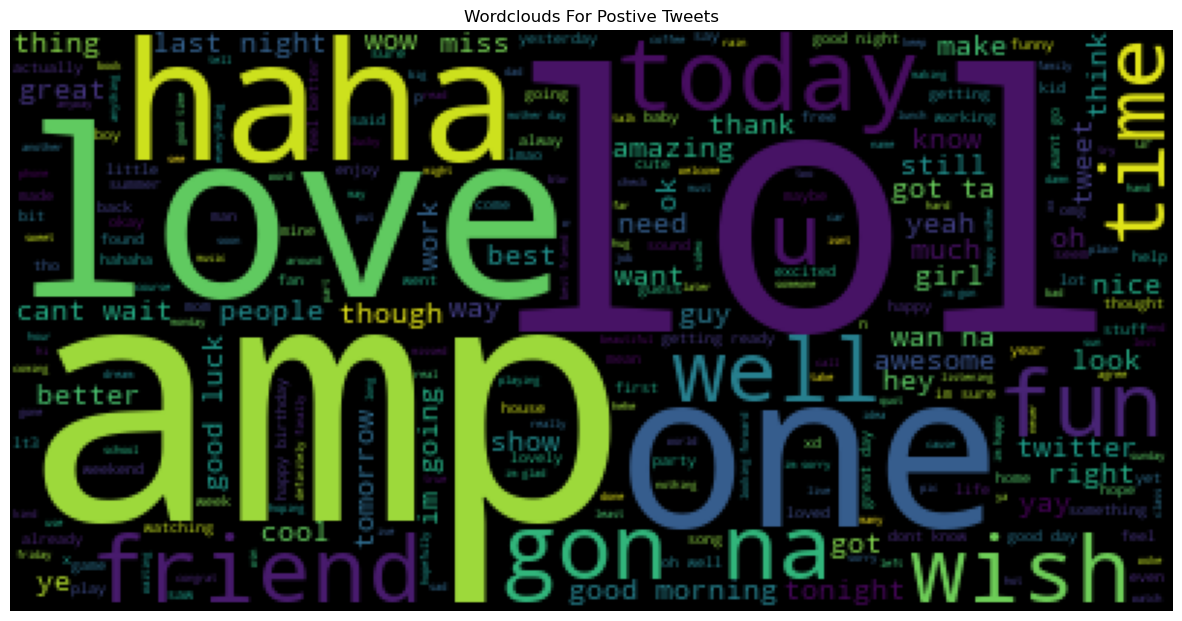

In [41]:
#Creating a wordcloud for positive sentiment tweets.
plt.figure(figsize=(15,10))
text=' '.join(eda[eda['Sentiments']=='POSITIVE']['final_TweetText'])
wordcloud=WordCloud(max_words=500,background_color='black', colormap='viridis').generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordclouds For Postive Tweets')
plt.show()

2. Creating wordcloud for Negative tweets

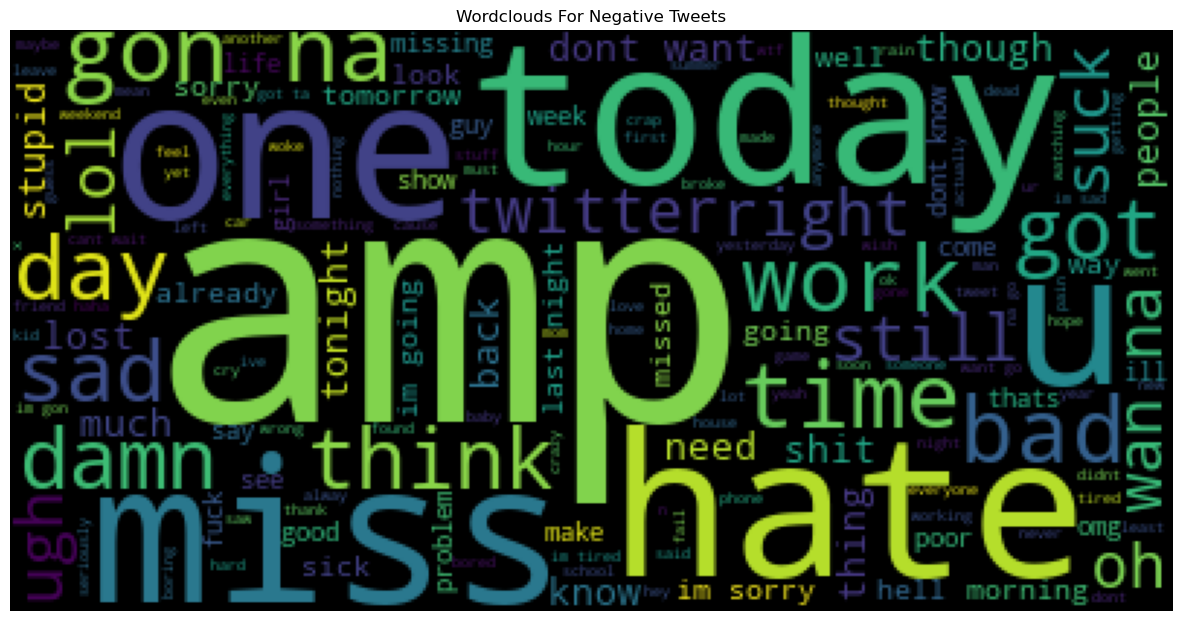

In [42]:
#Creating a wordcloud for negative sentiment tweets.
plt.figure(figsize=(15,10))
text=' '.join(eda[eda['Sentiments']=='NEGATIVE']['final_TweetText'])
wordcloud=WordCloud(max_words=500,background_color='black', colormap='viridis').generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordclouds For Negative Tweets')
plt.show()

3. Creating wordcloud for Neutral tweets

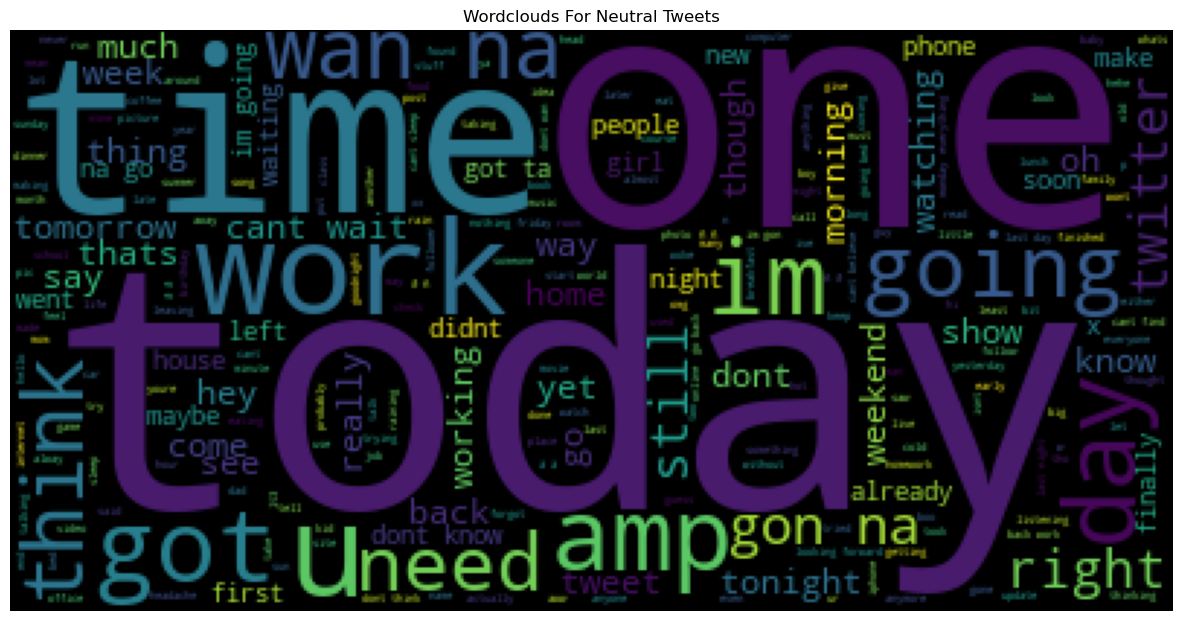

In [43]:
#Creating a wordcloud for neutral sentiment tweets.
plt.figure(figsize=(15,10))
text=' '.join(eda[eda['Sentiments']=='NEUTRAL']['final_TweetText'])
wordcloud=WordCloud(max_words=500,background_color='black', colormap='viridis').generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordclouds For Neutral Tweets')
plt.show()

### 7. TREND/TIMELINE ANALYSIS

In order to achieve a timeline or trend analysis, we will need to convert our existing dataset to a time series. This conversion will only be done to our Date column of our dataset.

In [44]:
#Copying our existing dataset
datadate=data.copy()

#Transforming Date column of our dataset to a timeseries
datadate['Date']=pd.to_datetime(datadate['Date'])
datadate.set_index('Date',inplace=True)

#Checking top of our dataset
datadate.head()

,Sentiments,IDs,Flag,User,TweetText,final_TweetText,Sentiments_compound_polarity,Sentiments_neutral,Sentiments_negative,Sentiments_positive,Sentiments_type
Date,,,,,,,,,,,
2009-04-06 22:19:49,NEGATIVE,1467810672,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...,upset cant update facebook texting might cry r...,-0.7269,0.559,0.441,0.000,
2009-04-06 22:19:53,POSITIVE,1467810917,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...,dived many time ball managed save 50 rest go b...,0.4939,0.738,0.000,0.262,
2009-04-06 22:19:57,NEGATIVE,1467811184,NO_QUERY,ElleCTF,whole body feels itchy like fire,whole body feel itchy like fire,-0.2500,0.300,0.450,0.250,
2009-04-06 22:19:57,NEGATIVE,1467811193,NO_QUERY,Karoli,behaving im mad cant see,behaving im mad cant see,-0.4939,0.556,0.444,0.000,
2009-04-06 22:20:00,NEUTRAL,1467811372,NO_QUERY,joy_wolf,whole crew,whole crew,0.0000,1.000,0.000,0.000,


Forming different datasets based on our Sentiments 

In [45]:
#Creating datasets based on our data's sentiment types.
datadateneg=datadate[datadate['Sentiments']=='NEGATIVE']
datadateneg['Sentiments']=1

datadateneu=datadate[datadate['Sentiments']=='NEUTRAL']
datadateneu['Sentiments']=1

datadatepos=datadate[datadate['Sentiments']=='POSITIVE']
datadatepos['Sentiments']=1

Performing a resample for easy timeline or trend developing.

In [46]:
#Resampling our newly created data for easy trend/timeline developing.
datadateneg=datadateneg.resample(rule='D').sum()
datadatepos=datadatepos.resample(rule='D').sum()
datadateneu=datadateneu.resample(rule='D').sum()

#### Trend/Timeline Visualization

In [47]:
#Ploting a graph of TweetText by Sentiments against Time.
fig=go.Figure()
fig.add_trace(go.Scatter(x=datadatepos.index,y=datadatepos['Sentiments'],name='Positive'))
fig.add_trace(go.Scatter(x=datadateneu.index,y=datadateneu['Sentiments'],name='Neutral'))
fig.add_trace(go.Scatter(x=datadateneg.index,y=datadateneg['Sentiments'],name='Negative'))
fig.update_layout(
    title={'text':"A Graph Showing Timeline for Tweet Text by Sentiment Types",'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

### REFERENCES:

1. https://plotly.com/python/funnel-charts/

2. https://www.geeksforgeeks.org/how-to-add-a-title-to-seaborn-plots/

3. https://www.w3schools.com/python/default.asp

4. https://www.kaggle.com/code/isanbel/depression-on-twitter